In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sao filipe cv
rikitea pf
punta arenas cl
bredasdorp za
havelock us
yellowknife ca
barentsburg sj
illoqqortoormiut gl
rikitea pf
rikitea pf
riberalta bo
belushya guba ru
machali cl
avarua ck
the valley ai
barentsburg sj
emba kz
busselton au
yudong cn
thompson ca
vaitupu wf
korla cn
amderma ru
jamestown sh
taolanaro mg
salamiyah sy
mazyr by
kenora ca
geraldton au
busselton au
urubicha bo
cape town za
kapaa us
mar del plata ar
pringsewu id
chimbote pe
hay river ca
ushuaia ar
norman wells ca
tabuk sa
ribeirao branco br
deputatskiy ru
kulhudhuffushi mv
benguela ao
leningradskiy ru
san patricio mx
kahului us
busselton au
clyde river ca
ushuaia ar
amapa br
hermanus za
tilichiki ru
rikitea pf
mataura pf
hearst ca
bredasdorp za
ye mm
upernavik gl
pevek ru
dubbo au
bredasdorp za
andenes no
novyy urengoy ru
avarua ck
illoqqortoormiut gl
puerto ayora ec
myitkyina mm
illoqqortoormiut gl
alekseyevsk ru
zaozerne ua
mar del plata ar
bambous virieux mu
aykhal ru
kodiak us
butaritari ki
zhob pk
kaitanga

barentsburg sj
vestmannaeyjar is
hermanus za
punta arenas cl
hermanus za
lipin bor ru
bilma ne
san patricio mx
walvis bay na
rikitea pf
hilo us
rikitea pf
hilo us
tahe cn
jamestown sh
kalangala ug
albany au
lata sb
mao td
hobart au
shitanjing cn
rikitea pf
busselton au
virginia beach us
phan thiet vn
bluff nz
sioux lookout ca
lakatoro vu
san quintin mx
punta arenas cl
lebu cl
east london za
ilinskiy ru
abu dhabi ae
balabac ph
katsuura jp
haines junction ca
port alfred za
hermanus za
bredasdorp za
georgetown sh
coahuayana mx
punta arenas cl
shillong in
castro cl
longyearbyen sj
butaritari ki
lac du bonnet ca
lima pe
saint george bm
mataura pf
hollola fi
arroyo us
axim gh
jaru br
takoradi gh
albany au
kruisfontein za
port macquarie au
yellowknife ca
cabo san lucas mx
geraldton au
avera pf
saskylakh ru
alushta ua
ribeira grande pt
nikolskoye ru
upernavik gl
cape town za
taolanaro mg
tiksi ru
kapaa us
bethel us
chulman ru
bluff nz
ushuaia ar
beloha mg
saint-philippe re
qaqortoq gl
winslow 

port moresby pg
lebu cl
torbay ca
georgetown sh
busselton au
meridian us
dieppe fr
le port re
northam au
ushuaia ar
georgetown sh
sterling us
albany au
taolanaro mg
ushuaia ar
ushuaia ar
atuona pf
puspokladany hu
lompoc us
barrow us
norman wells ca
aras no
busselton au
albany au
tasiilaq gl
lompoc us
vihti fi
carnarvon au
cascais pt
kaitangata nz
mandla in
ushuaia ar
upernavik gl
arraial do cabo br
kapaa us
clifton us
mafeteng ls
cesvaine lv
jamestown sh
hermanus za
atuona pf
ijaki ki
tokzar af
souillac mu
pisco pe
kamenskoye ru
amderma ru
ushuaia ar
verkhnyaya balkariya ru
san cristobal ec
bosaso so
hilo us
kabo cf
hobart au
wamba cd
arica cl
avarua ck
hermanus za
kapaa us
mugla tr
nikolskoye ru
hilo us
port keats au
mount isa au
yellowknife ca
saint-augustin ca
belushya guba ru
ponta do sol cv
the valley ai
tiksi ru
peebles gb
yellowknife ca
cockburn town bs
shingu jp
kapaa us
vaitupu wf
port blair in
maun bw
vaini to
hobart au
romitan uz
palamos es
kahului us
albany au
cape town za


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=127fb17e26d632020d1b4aa5a2ef39e8


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | havelock
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | riberalta
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | machali
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | the valley
Processing Record 14 of Set 1 | emba
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | yudong
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | korla
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 1 | j

Processing Record 40 of Set 4 | tarnos
Processing Record 41 of Set 4 | tezu
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | brigantine
Processing Record 44 of Set 4 | grand gaube
Processing Record 45 of Set 4 | kargasok
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | salinopolis
Processing Record 48 of Set 4 | podosinovets
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | filadelfia
Processing Record 1 of Set 5 | jijiga
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | dingle
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | fort-shevchenko
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | berlevag
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | la union
Processing Record 10 of Set 5 | guerrero negro
Processing Record 11 of Set 5 | monastyryshche
Processing Record 12 of Set 5 | kudymkar
Processing Record 13 of Set 5 | coquimbo
P

Processing Record 31 of Set 8 | wahiawa
Processing Record 32 of Set 8 | kaeo
Processing Record 33 of Set 8 | kijang
Processing Record 34 of Set 8 | isangel
Processing Record 35 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 36 of Set 8 | zhigansk
Processing Record 37 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 38 of Set 8 | kavieng
Processing Record 39 of Set 8 | aksha
Processing Record 40 of Set 8 | lins
Processing Record 41 of Set 8 | aswan
Processing Record 42 of Set 8 | puerto escondido
Processing Record 43 of Set 8 | tsumeb
Processing Record 44 of Set 8 | kerikeri
Processing Record 45 of Set 8 | karaul
City not found. Skipping...
Processing Record 46 of Set 8 | fairview
Processing Record 47 of Set 8 | palmer
Processing Record 48 of Set 8 | sungaipenuh
Processing Record 49 of Set 8 | sao felix do xingu
Processing Record 50 of Set 8 | husavik
Processing Record 1 of Set 9 | port moresby
Processing Record 2 of Set 9 | khatanga
Processing

Processing Record 18 of Set 12 | sao joao da barra
Processing Record 19 of Set 12 | gamba
Processing Record 20 of Set 12 | ust-tsilma
Processing Record 21 of Set 12 | alice springs
Processing Record 22 of Set 12 | houma
Processing Record 23 of Set 12 | yeppoon
Processing Record 24 of Set 12 | nagaur
Processing Record 25 of Set 12 | roma
Processing Record 26 of Set 12 | kangaatsiaq
Processing Record 27 of Set 12 | tartus
Processing Record 28 of Set 12 | mumford
Processing Record 29 of Set 12 | magistralnyy
Processing Record 30 of Set 12 | goderich
Processing Record 31 of Set 12 | marsh harbour
Processing Record 32 of Set 12 | meridian
Processing Record 33 of Set 12 | dieppe
Processing Record 34 of Set 12 | le port
Processing Record 35 of Set 12 | northam
Processing Record 36 of Set 12 | sterling
Processing Record 37 of Set 12 | puspokladany
Processing Record 38 of Set 12 | aras
Processing Record 39 of Set 12 | vihti
Processing Record 40 of Set 12 | cascais
Processing Record 41 of Set 12

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.79,-152.41,33.80,69,90,4.70,US,2020-10-30 22:08:13
1,Butaritari,3.07,172.79,82.38,78,63,20.15,KI,2020-10-30 22:09:32
2,Punta Arenas,-53.15,-70.92,53.60,62,75,31.09,CL,2020-10-30 22:07:10
3,Geilo,60.53,8.21,32.00,89,100,4.63,NO,2020-10-30 22:09:32
4,Aksu,41.12,80.26,40.15,64,24,3.33,CN,2020-10-30 22:09:32
5,Bukachacha,52.98,116.92,24.94,91,100,5.39,RU,2020-10-30 22:09:33
6,Atuona,-9.80,-139.03,77.81,72,87,10.94,PF,2020-10-30 22:09:33
7,Sioux Lookout,50.10,-91.92,30.20,74,90,12.75,CA,2020-10-30 22:09:02
8,Merauke,-8.47,140.33,79.93,81,86,10.04,ID,2020-10-30 22:07:43
9,Carnarvon,-24.87,113.63,71.60,78,90,8.05,AU,2020-10-30 22:09:34


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [28]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2020-10-30 22:08:13,57.79,-152.41,33.80,69,90,4.70
1,Butaritari,KI,2020-10-30 22:09:32,3.07,172.79,82.38,78,63,20.15
2,Punta Arenas,CL,2020-10-30 22:07:10,-53.15,-70.92,53.60,62,75,31.09
3,Geilo,NO,2020-10-30 22:09:32,60.53,8.21,32.00,89,100,4.63
4,Aksu,CN,2020-10-30 22:09:32,41.12,80.26,40.15,64,24,3.33
...,...,...,...,...,...,...,...,...,...
566,Sorgun,TR,2020-10-30 22:11:59,39.81,35.19,54.45,47,1,8.86
567,Buin,CL,2020-10-30 22:11:59,-33.73,-70.75,84.20,23,0,6.93
568,Manta,EC,2020-10-30 22:11:59,-0.95,-80.73,77.00,73,40,14.99
569,Sao Felix Do Xingu,BR,2020-10-30 22:12:00,-6.64,-51.99,71.58,96,100,4.18


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604096104.1590488

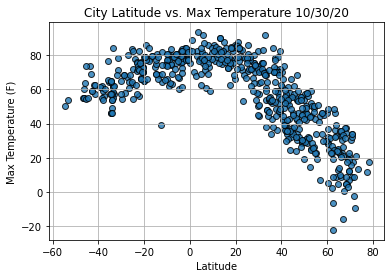

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

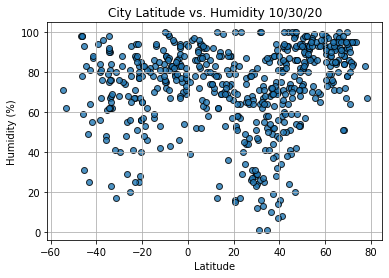

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

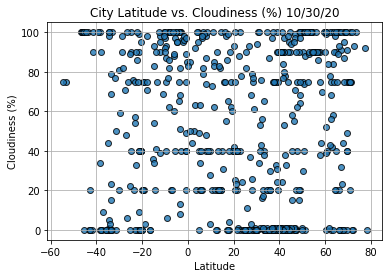

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

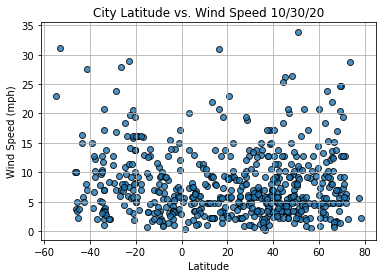

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2020-10-30 22:08:13,57.79,-152.41,33.80,69,90,4.70
1,Butaritari,KI,2020-10-30 22:09:32,3.07,172.79,82.38,78,63,20.15
3,Geilo,NO,2020-10-30 22:09:32,60.53,8.21,32.00,89,100,4.63
4,Aksu,CN,2020-10-30 22:09:32,41.12,80.26,40.15,64,24,3.33
5,Bukachacha,RU,2020-10-30 22:09:33,52.98,116.92,24.94,91,100,5.39
...,...,...,...,...,...,...,...,...,...
563,Yatou,CN,2020-10-30 22:11:58,37.15,122.38,52.41,69,100,5.50
564,Valentin Gomez Farias,MX,2020-10-30 22:11:58,28.22,-106.58,73.99,25,77,8.01
565,Mae Sai,TH,2020-10-30 22:11:58,20.43,99.88,71.60,100,20,2.24
566,Sorgun,TR,2020-10-30 22:11:59,39.81,35.19,54.45,47,1,8.86


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

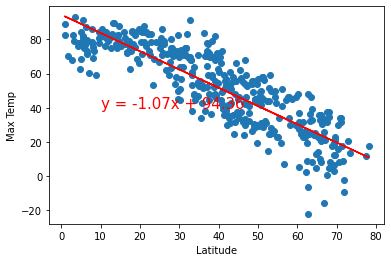

In [63]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

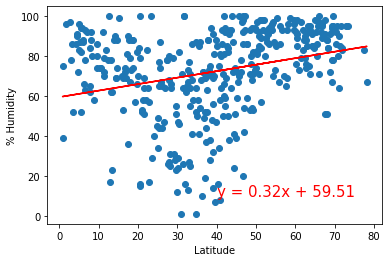

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

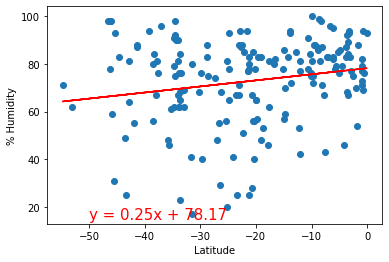

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

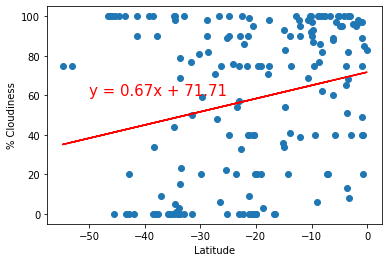

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

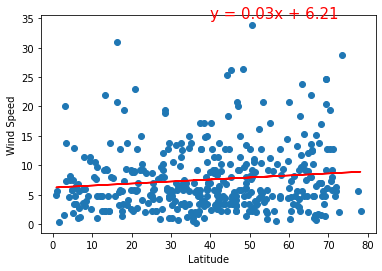

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

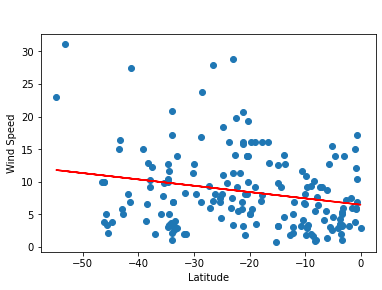

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
d